# Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

## ETL

In [2]:
# Estrazione dei dati
file = 'Crime_Data_from_2020_to_Present.csv'
crime = pd.read_csv(file)
print(crime)

             DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130   
1        200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800   
2        200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700   
3        200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037   
4        200412582  09/09/2020 12:00:00 AM  09/09/2020 12:00:00 AM       630   
...            ...                     ...                     ...       ...   
1003443  240710284  07/24/2024 12:00:00 AM  07/23/2024 12:00:00 AM      1400   
1003444  240104953  01/15/2024 12:00:00 AM  01/15/2024 12:00:00 AM       100   
1003445  240410786  10/14/2024 12:00:00 AM  10/11/2024 12:00:00 AM      2330   
1003446  240309674  04/24/2024 12:00:00 AM  04/24/2024 12:00:00 AM      1500   
1003447  240910892  08/13/2024 12:00:00 AM  08/12/2024 12:00:00 AM      2300   

         AREA   AREA NAME  Rpt Dist No 

In [13]:
crime. isnull().sum()
crime.dropna()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Criminal Activity Duration,Active Status
49169,200613424,2020-08-02,2020-08-02,2030,6,Hollywood,657,Grave,761,BRANDISH WEAPON,...,761.0,920.0,930.0,998.0,WESTERN,ROMAINE,34.0885,-118.3092,0,Active
142047,201904032,2020-01-02,2020-01-01,2135,19,Mission,1924,Grave,761,BRANDISH WEAPON,...,761.0,930.0,997.0,998.0,ASTORIA ST,SAN FERNANDO RD,34.2949,-118.4571,1,Active
363763,210617136,2021-10-08,2021-10-07,1950,6,Hollywood,659,Grave,121,"RAPE, FORCIBLE",...,121.0,210.0,910.0,998.0,NORMANDIE,DE LONGPRE,34.0966,-118.3005,1,Active
372515,210209196,2021-05-08,2021-05-08,230,2,Rampart,279,Grave,210,ROBBERY,...,210.0,510.0,910.0,998.0,JAMES M WOOD,GREEN,34.0503,-118.2720,0,Active
490083,220600626,2022-04-27,2022-04-23,2300,6,Hollywood,646,Grave,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,...,230.0,821.0,910.0,998.0,SELMA,LAS PALMAS,34.0997,-118.3363,4,Active
537825,221718232,2022-12-25,2022-12-25,1150,17,Devonshire,1797,Grave,122,"RAPE, ATTEMPTED",...,122.0,230.0,910.0,998.0,PARTHENIA ST,HAYVENHURST,34.2285,-118.4939,0,Active
585975,221401314,2022-11-10,2022-11-10,2117,14,Pacific,1452,Minore,910,KIDNAPPING,...,812.0,860.0,910.0,998.0,WASHINGTON,SPEEDWAY,33.9792,-118.4666,0,Active
728535,231717599,2023-11-15,2023-11-15,400,17,Devonshire,1738,Grave,210,ROBBERY,...,210.0,230.0,761.0,998.0,HASKELL AV,SAN FERNANDO BL,34.2692,-118.4789,0,Active
809392,231915572,2023-10-21,2023-10-21,1,19,Mission,1902,Grave,210,ROBBERY,...,210.0,250.0,761.0,998.0,POLK,BORDEN,34.3103,-118.4467,0,Active
934032,241905348,2024-02-04,2024-02-03,1100,19,Mission,1983,Grave,820,ORAL COPULATION,...,761.0,820.0,910.0,998.0,BURNET,PARTHENIA,34.2282,-118.4633,1,Active


In [15]:
crime.dropna()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Criminal Activity Duration,Active Status
49169,200613424,2020-08-02,2020-08-02,2030,6,Hollywood,657,Grave,761,BRANDISH WEAPON,...,761.0,920.0,930.0,998.0,WESTERN,ROMAINE,34.0885,-118.3092,0,Active
142047,201904032,2020-01-02,2020-01-01,2135,19,Mission,1924,Grave,761,BRANDISH WEAPON,...,761.0,930.0,997.0,998.0,ASTORIA ST,SAN FERNANDO RD,34.2949,-118.4571,1,Active
363763,210617136,2021-10-08,2021-10-07,1950,6,Hollywood,659,Grave,121,"RAPE, FORCIBLE",...,121.0,210.0,910.0,998.0,NORMANDIE,DE LONGPRE,34.0966,-118.3005,1,Active
372515,210209196,2021-05-08,2021-05-08,230,2,Rampart,279,Grave,210,ROBBERY,...,210.0,510.0,910.0,998.0,JAMES M WOOD,GREEN,34.0503,-118.2720,0,Active
490083,220600626,2022-04-27,2022-04-23,2300,6,Hollywood,646,Grave,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,...,230.0,821.0,910.0,998.0,SELMA,LAS PALMAS,34.0997,-118.3363,4,Active
537825,221718232,2022-12-25,2022-12-25,1150,17,Devonshire,1797,Grave,122,"RAPE, ATTEMPTED",...,122.0,230.0,910.0,998.0,PARTHENIA ST,HAYVENHURST,34.2285,-118.4939,0,Active
585975,221401314,2022-11-10,2022-11-10,2117,14,Pacific,1452,Minore,910,KIDNAPPING,...,812.0,860.0,910.0,998.0,WASHINGTON,SPEEDWAY,33.9792,-118.4666,0,Active
728535,231717599,2023-11-15,2023-11-15,400,17,Devonshire,1738,Grave,210,ROBBERY,...,210.0,230.0,761.0,998.0,HASKELL AV,SAN FERNANDO BL,34.2692,-118.4789,0,Active
809392,231915572,2023-10-21,2023-10-21,1,19,Mission,1902,Grave,210,ROBBERY,...,210.0,250.0,761.0,998.0,POLK,BORDEN,34.3103,-118.4467,0,Active
934032,241905348,2024-02-04,2024-02-03,1100,19,Mission,1983,Grave,820,ORAL COPULATION,...,761.0,820.0,910.0,998.0,BURNET,PARTHENIA,34.2282,-118.4633,1,Active


In [16]:
crime. isnull().sum()

DR_NO                               0
Date Rptd                           0
DATE OCC                            0
TIME OCC                            0
AREA                                0
AREA NAME                           0
Rpt Dist No                         0
Part 1-2                            0
Crm Cd                              0
Crm Cd Desc                         0
Mocodes                        151567
Vict Age                            0
Vict Sex                       144592
Vict Descent                   144604
Premis Cd                          16
Premis Desc                       588
Weapon Used Cd                 676308
Weapon Desc                    676308
Status                              1
Status Desc                         0
Crm Cd 1                           11
Crm Cd 2                       934330
Crm Cd 3                      1001133
Crm Cd 4                      1003384
LOCATION                            0
Cross Street                   849335
LAT         

In [4]:
# 2. Trasformazione (Transform)

# a. Gestione delle colonne di data (Date Rptd, DATE OCC)
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# b. Gestione delle colonne di tipo di crimine e classificazione
crime['Crm Cd Desc'] = crime['Crm Cd Desc'].str.strip()  # Rimuove gli spazi extra
crime['Crm Cd'] = crime['Crm Cd'].astype('category')

# c. Gestione della classificazione del crimine (grave o meno grave)
crime['Part 1-2'] = crime['Part 1-2'].map({1: 'Grave', 2: 'Minore'})
crime['Part 1-2'] = crime['Part 1-2']

# d. Gestione delle colonne di latitudine e longitudine (per controllare dati inconsistenti)
crime['LAT'] = pd.to_numeric(crime['LAT'], errors='coerce')
crime['LON'] = pd.to_numeric(crime['LON'], errors='coerce')

# e. Gestione delle colonne di vittima (età, sesso, etnia)
crime['Vict Age'] = pd.to_numeric(crime['Vict Age'], errors='coerce')
crime['Vict Sex'] = crime['Vict Sex'].replace({'H': 'Altro', '-': 'Altro', 'X': 'Altro'})
crime['Vict Descent'] = crime['Vict Descent']

# f. Gestione dello stato del crimine (Status)
crime['Status'] = crime['Status'].str.strip()

# g. Gestione della località (LOCATION)
crime['LOCATION'] = crime['LOCATION'].str.strip()

# h. Rimozione di righe duplicate
crime = crime.drop_duplicates()

# i. Creazione di una nuova colonna "Criminal Activity Duration" in giorni
crime['Criminal Activity Duration'] = (crime['Date Rptd'] - crime['DATE OCC']).dt.days

# j. Creazione di una colonna di "Active Status" in base alla colonna 'Status'
crime['Active Status'] = np.where(crime['Status'] == 'Closed', 'Inactive', 'Active')


## Analisi Dataset

In [11]:
crime.dtypes

DR_NO                                  int64
Date Rptd                     datetime64[ns]
DATE OCC                      datetime64[ns]
TIME OCC                               int64
AREA                                   int64
AREA NAME                             object
Rpt Dist No                            int64
Part 1-2                              object
Crm Cd                              category
Crm Cd Desc                           object
Mocodes                               object
Vict Age                               int64
Vict Sex                              object
Vict Descent                          object
Premis Cd                            float64
Premis Desc                           object
Weapon Used Cd                       float64
Weapon Desc                           object
Status                                object
Status Desc                           object
Crm Cd 1                             float64
Crm Cd 2                             float64
Crm Cd 3  

In [22]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Criminal Activity Duration', 'Active Status'],
      dtype='object')

## Analisi descrittiva e visualizzazione del Dataset

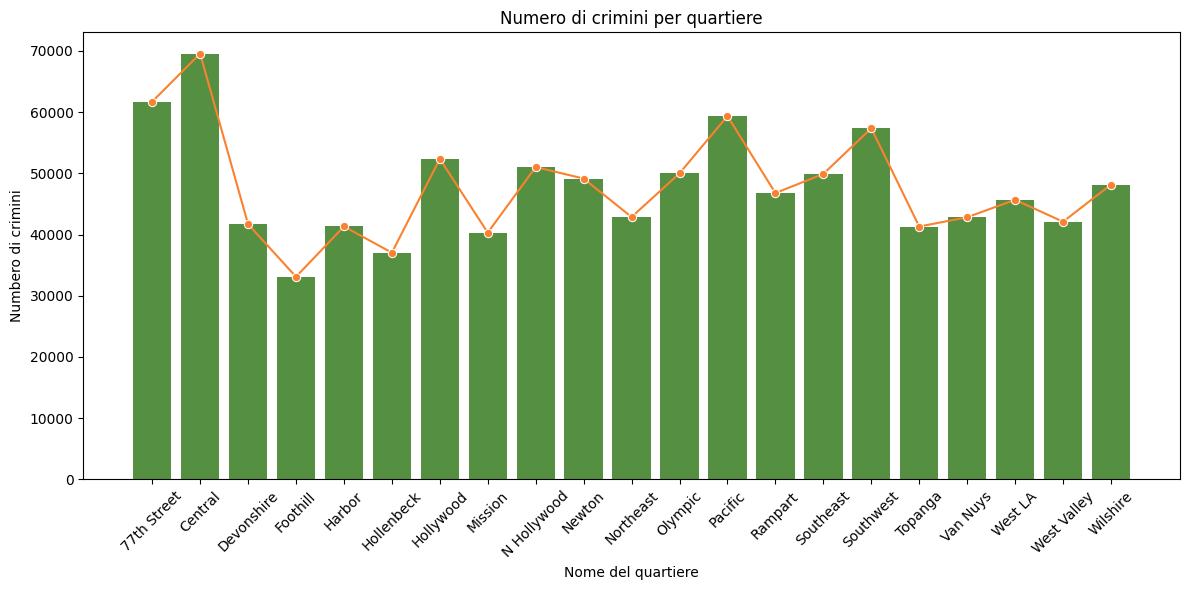

In [23]:
# Crimini distribuiti per area
crime_counts = crime.groupby('AREA NAME')['DR_NO'].count().reset_index()
crime_counts.columns = ['AREA NAME', 'Crime Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='AREA NAME', y='Crime Count', data=crime_counts, color='#4e9c35')
sns.lineplot(x='AREA NAME', y='Crime Count', data=crime_counts, marker='o', color='#FA812F')

plt.title('Numero di crimini per quartiere')
plt.xlabel('Nome del quartiere')
plt.ylabel('Numbero di crimini')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


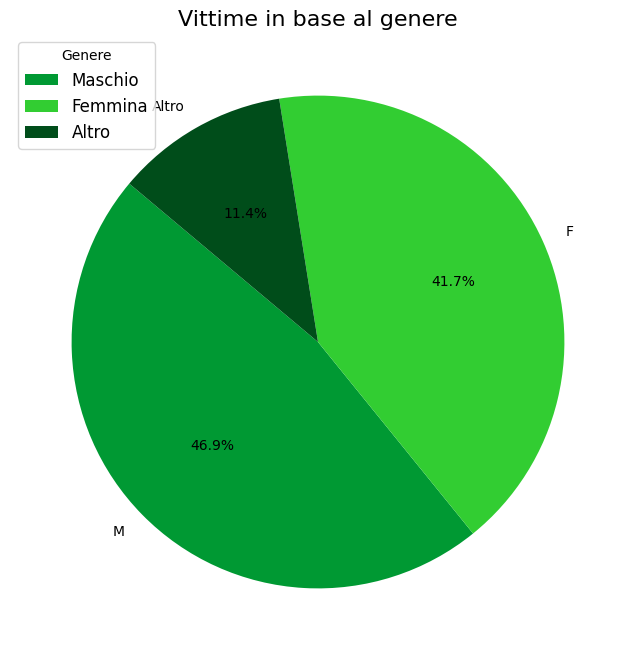

In [24]:
# Crimini in base al sesso
gender_counts = crime['Vict Sex'].value_counts()

plt.figure(figsize=(8, 8))

# Grafico a torta
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['#009933', '#32CD32', '#004d1a'])

# Titolo
plt.title('Vittime in base al genere', fontsize=16)

# Aggiungere la legenda
gender_meanings = {'M': 'Maschio', 'F': 'Femmina', 'X': 'Altro'}
legend_labels = [f"{gender_meanings.get(label, label)}" for label in gender_counts.index]
plt.legend(legend_labels, title='Genere', loc='upper left', fontsize=12)

plt.show()


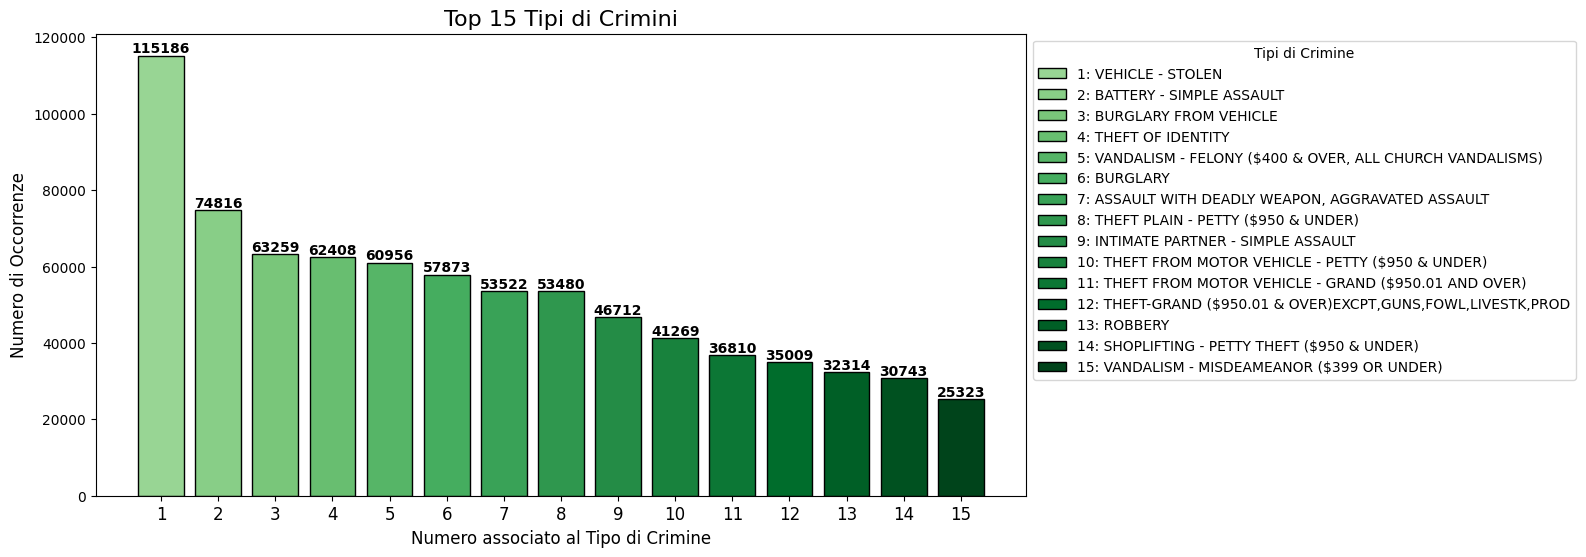

In [18]:
# Conta i tipi di crimine e seleziona i primi 15
crime_type_counts = crime['Crm Cd Desc'].value_counts().head(15)

# Crea un mapping tra numeri e tipi di crimine
crime_labels = {i+1: crime_type_counts.index[i] for i in range(len(crime_type_counts))}

# Imposta la dimensione della figura
plt.figure(figsize=(12, 6))

# Genera i colori in una palette verde
colors = plt.cm.Greens(np.linspace(0.4, 1, len(crime_type_counts)))

# Crea il grafico a barre con numeri da 1 a 15 sull'asse X
bars = plt.bar(range(1, 16), crime_type_counts.values, color=colors, edgecolor='black')

# Aggiunge i valori sulle barre
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             str(bar.get_height()), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titoli e etichette
plt.title('Top 15 Tipi di Crimini', fontsize=16)
plt.xlabel('Numero associato al Tipo di Crimine', fontsize=12)
plt.ylabel('Numero di Occorrenze', fontsize=12)

# Imposta i numeri 1-15 come etichette sull'asse X
plt.xticks(range(1, 16), fontsize=12)

# Crea la legenda separata in alto a destra
legend_labels = [f"{i}: {crime_labels[i]}" for i in range(1, 16)]
plt.legend(bars, legend_labels, title="Tipi di Crimine", loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Mostra il grafico
plt.show()

In [ ]:
import folium
import pandas as pd
from IPython.display import display

# Supponiamo che il DataFrame 'crime' sia già definito
pos_crime = crime[['LAT', 'LON', 'AREA NAME']]

# Filtra i dati in base ai quartili per rimuovere gli outlier sulla latitudine
q1, q2, q3 = pos_crime['LAT'].quantile([0.25, 0.5, 0.75]).tolist()
pos_data = pos_crime[
    (pos_crime['LAT'] >= (q1 - 1.5 * (q3 - q1))) &
    (pos_crime['LAT'] <= (q3 + 1.5 * (q3 - q1)))
]

print(f"Numero di dati dopo il filtro: {len(pos_data)}")
print(pos_data.head())


# Coordinate centrali per Los Angeles
la_coords = [34.0522, -118.2437]
m = folium.Map(location=la_coords, zoom_start=10)

# Aggiungi un marker per ogni punto
for idx, row in pos_data.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=5,
        popup=f"Area: {row['AREA NAME']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Salva la mappa in un file HTML (opzionale)
m


Numero di dati dopo il filtro: 972555
       LAT       LON   AREA NAME
0  34.0375 -118.3506    Wilshire
1  34.0444 -118.2628     Central
2  34.0210 -118.3002   Southwest
3  34.1576 -118.4387    Van Nuys
4  34.0820 -118.2130  Hollenbeck


Numero di dati dopo il filtro: 972555
       LAT       LON   AREA NAME
0  34.0375 -118.3506    Wilshire
1  34.0444 -118.2628     Central
2  34.0210 -118.3002   Southwest
3  34.1576 -118.4387    Van Nuys
4  34.0820 -118.2130  Hollenbeck


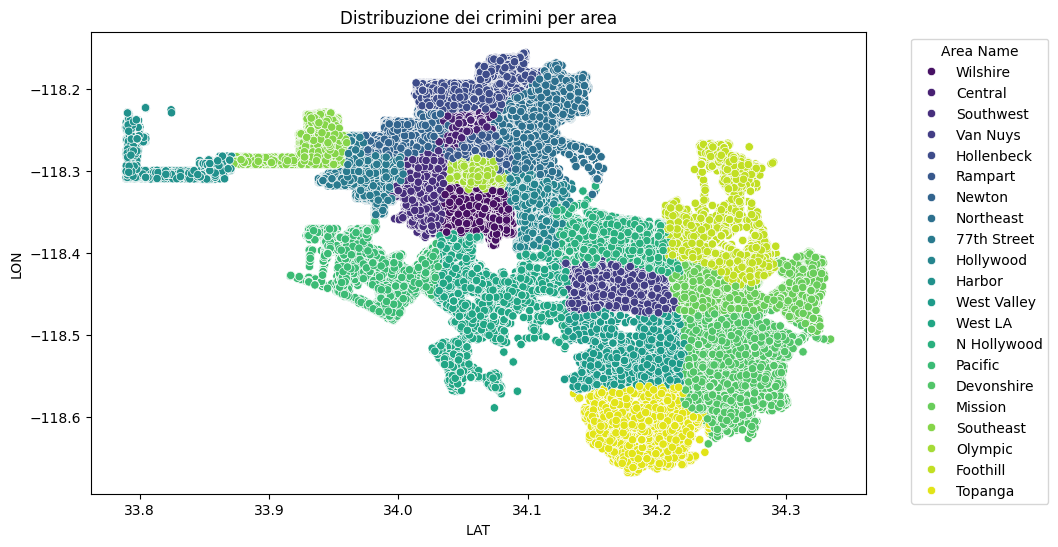

In [12]:
pos_crime = crime[['LAT','LON','AREA NAME']]
# Filtra i dati in base ai quartili per rimuovere i valori anomali
q1, q2, q3 = pos_crime['LAT'].quantile([0.25, 0.5, 0.75]).tolist()
pos_data = pos_crime[(pos_crime['LAT'] >= (q1 - 1.5 * (q3 - q1))) &
                     (pos_crime['LAT'] <= (q3 + 1.5 * (q3 - q1)))]

# Controlla se ci sono dati nel set dopo il filtro
print(f"Numero di dati dopo il filtro: {len(pos_data)}")
print(pos_data.head())

# Se ci sono dati, procediamo con la visualizzazione
if len(pos_data) > 0:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=pos_data, x='LAT', y='LON', hue='AREA NAME', palette='viridis')
    plt.title('Distribuzione dei crimini per area')
    plt.legend(title='Area Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
else:
    print("Nessun dato disponibile dopo il filtro. Potresti voler controllare i valori di latitudine e longitudine.")
# mettere la cartina geografica di Los angeles

## Inzio Analisi temporali

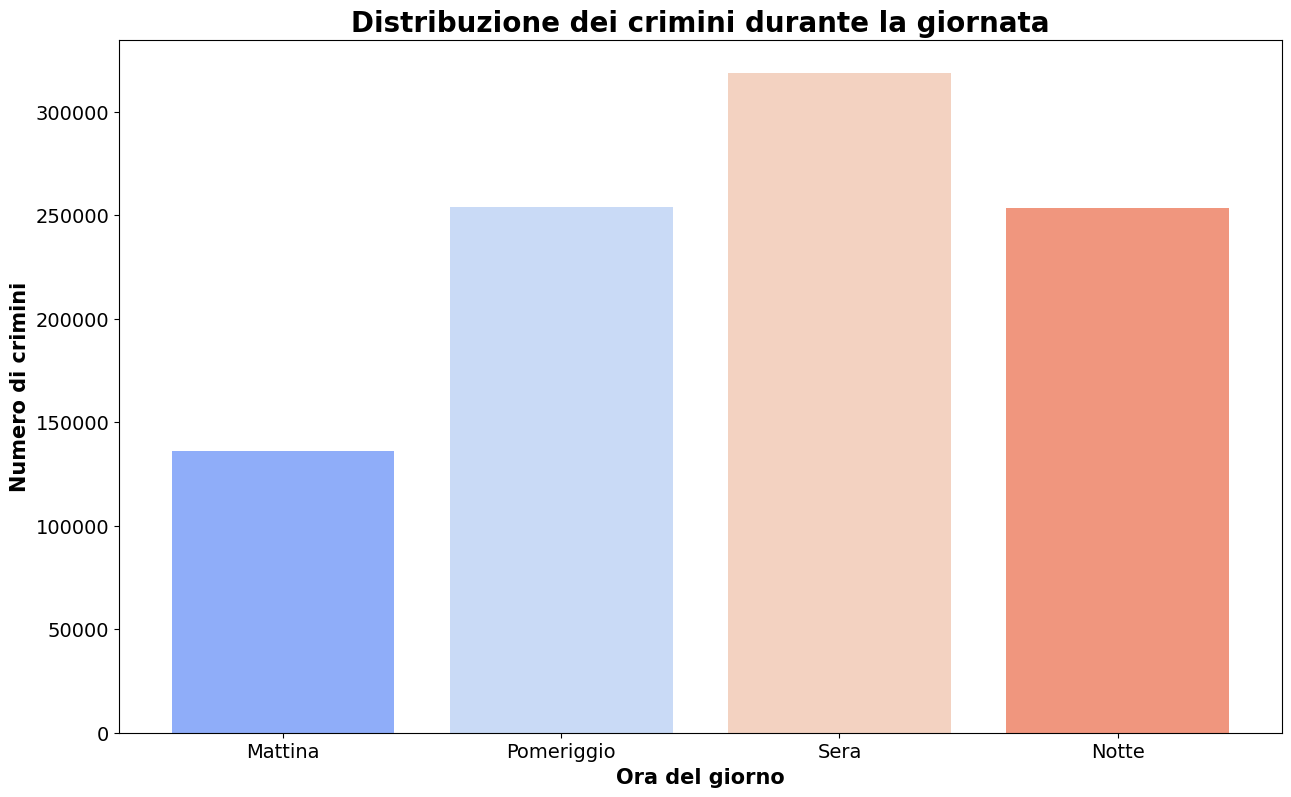

In [11]:
crime['Hour'] = crime['TIME OCC'] // 100 # New "Hour" column
time_increments = [0, 6, 12, 18, 24] # Bins grouped by hour of the day <1-6am, 7am-12pm, 1-6pm, 7pm-12am>
time_labels = [ 'Mattina', 'Pomeriggio', 'Sera', 'Notte']
crime['Fascia oraria'] = pd.cut(crime['Hour'], bins = time_increments, labels = time_labels, right=True)
# Seperating times into bins.

time_distribution = crime['Fascia oraria'].value_counts().reindex(time_labels)

plt.figure(figsize = (15, 9))
colors = sns.color_palette('coolwarm', len(time_distribution))

bars = plt.bar(time_distribution.index, time_distribution.values, color = colors, linewidth=2, alpha=0.85)

plt.title('Distribuzione dei crimini durante la giornata', fontsize = 20, fontweight = 'bold')
plt.xlabel('Ora del giorno', fontsize = 15, fontweight = 'bold')
plt.ylabel('Numero di crimini', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

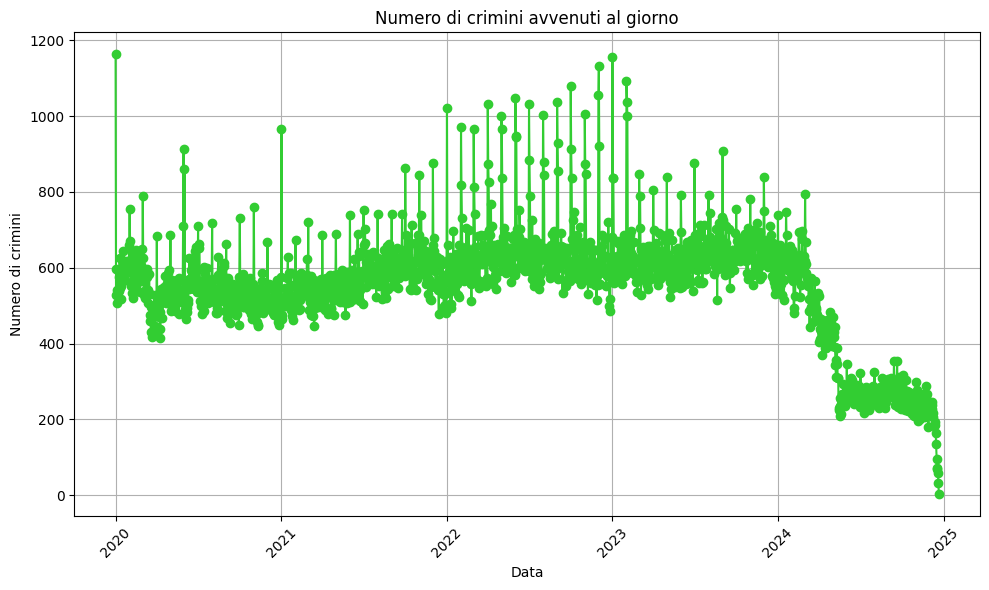

In [86]:
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'], errors='coerce')  # Convertiamo la colonna in datetime

# Contiamo il numero di crimini per ogni giorno
crime_counts = crime['DATE OCC'].value_counts().sort_index()

# Creiamo il grafico
plt.figure(figsize=(10, 6))
plt.plot(crime_counts.index, crime_counts.values, marker='o', linestyle='-', color='#32CD32')
plt.title('Numero di crimini avvenuti al giorno')
plt.xlabel('Data')
plt.ylabel('Numero di crimini')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostriamo il grafico
plt.show()

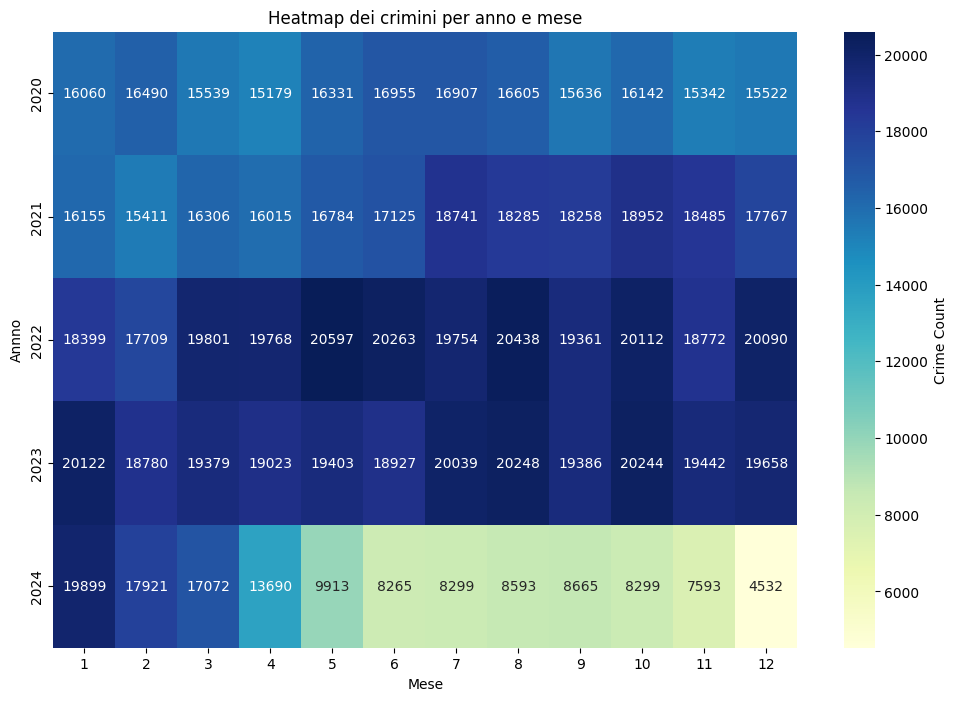

In [14]:
# Convert 'Date Rptd' to datetime format
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'])

# Extract month and year for analysis
crime['Month'] = crime['Date Rptd'].dt.month
crime['Year'] = crime['Date Rptd'].dt.year

# Create a pivot table to aggregate crime count by year and month
crime_heatmap_data = crime.groupby(['Year', 'Month']).size().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_heatmap_data, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Crime Count'})
plt.title('Heatmap dei crimini per anno e mese')
plt.xlabel('Mese')
plt.ylabel('Annno')
plt.show()

In [88]:
# Bar chart for crime occurrences per year
year_crime_data = crime.groupby('Year').size().reset_index(name='Crime Count')
bar_fig = px.bar(year_crime_data, x='Year', y='Crime Count', title='Crime Count per Year')

# Line chart for crime occurrences over time
time_series_data = crime.groupby('Date Rptd').size().reset_index(name='Crime Count')
line_fig = px.line(time_series_data, x='Date Rptd', y='Crime Count', title='Crime Count Over Time')

# Show both charts in one dashboard
bar_fig.show()
line_fig.show()

In [24]:
# Raggruppa per anno per visualizzare i crimini annuali
annual_crime_data = crime.groupby('Year').size().reset_index(name='Crime Count')

# Visualizza i crimini annuali
fig = px.line(annual_crime_data, x='Year', y='Crime Count', title='Trend dei crimini annuale')
fig.show()


In [25]:
# Aggiungi una colonna per il mese in formato numerico per il confronto
monthly_comparison = crime.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')

# Visualizza il confronto stagionale anno per anno
fig = px.line(monthly_comparison, x='Month', y='Crime Count', color='Year', title='Confronto stagionale della criminalità per anno')
fig.update_xaxes(tickmode='array', tickvals=monthly_comparison['Month'])
fig.show()


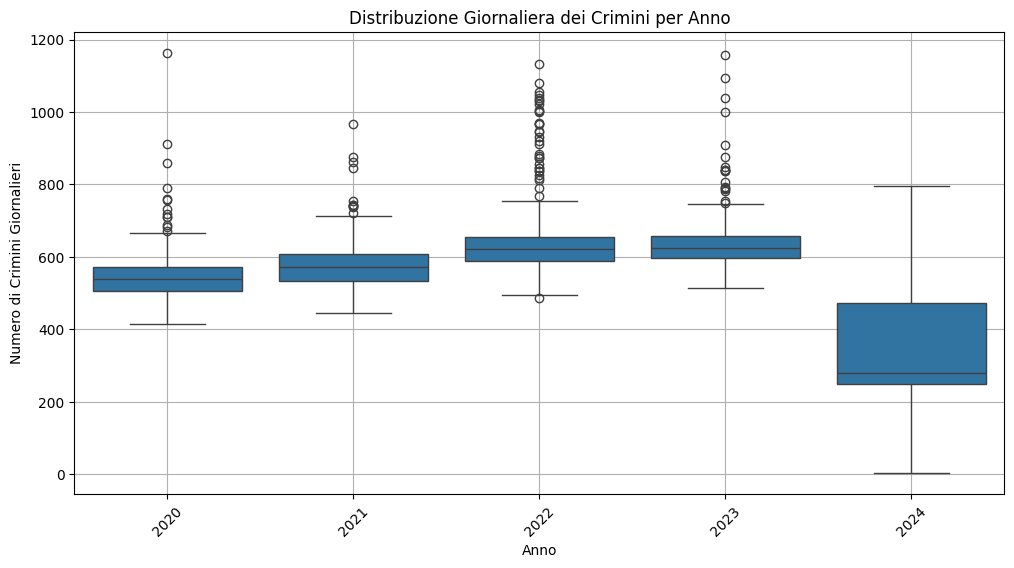

In [91]:
# Creazione di una colonna "Year" per l'anno
crime['Year'] = crime['DATE OCC'].dt.year

# Conta il numero di crimini per giorno
daily_crime_counts = crime.groupby(['Year', 'DATE OCC']).size().reset_index(name='Crime Count')

# Creazione del boxplot per la distribuzione dei crimini per anno
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=daily_crime_counts['Year'], y=daily_crime_counts['Crime Count'])

# Impostazione delle etichette e del titolo
ax.set_xlabel('Anno')
ax.set_ylabel('Numero di Crimini Giornalieri')
ax.set_title('Distribuzione Giornaliera dei Crimini per Anno')
plt.xticks(rotation=45)  # Ruota le etichette degli anni se necessario
plt.grid(True)

# Mostrare il grafico
plt.show()

# Trend forecasting

## Pre-elaborazione dei dati

Statistiche ADF: 0.11051571951615193
P-value: 0.9667717605849461
Numero di lags usati: 25
Numero di osservazioni: 1791
Valori critici:
	1%: -3.434
	5%: -2.863
	10%: -2.568


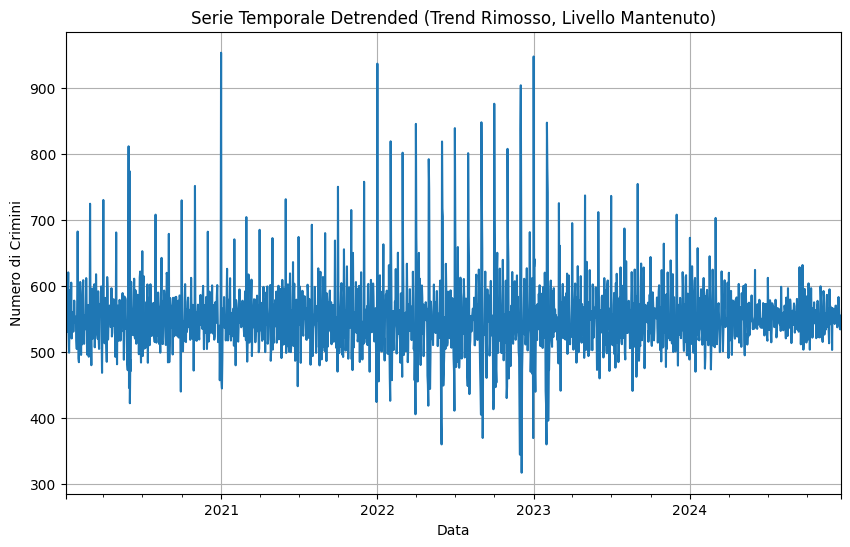

Statistiche ADF (Serie Detrended): -12.89207456452746
P-value (Serie Detrended): 4.426937985861253e-24
La serie detrended è stazionaria. Il valore di d è 1.


In [44]:
# 1. Test di Dickey-Fuller per verificare la stazionarietà
# Creiamo una serie temporale con il numero di crimini per giorno
crime_per_day = crime.groupby(crime['DATE OCC']).size()
result = adfuller(crime_per_day)

print(f"Statistiche ADF: {result[0]}")
print(f"P-value: {result[1]}")
print(f"Numero di lags usati: {result[2]}")
print(f"Numero di osservazioni: {result[3]}")
print(f"Valori critici:")
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

# Se p-value < 0.05, la serie è stazionaria
d = 0  # Inizializziamo d
if result[1] > 0.05:
    d += 1  # Incrementa d perché la serie non è stazionaria

    # Utilizziamo una media mobile per stimare il trend
    window = 7  # Ad esempio, una finestra settimanale (modifica in base alla frequenza dei dati)
    trend = crime_per_day.rolling(window=window, center=True).mean()

    # Rimuoviamo il trend dalla serie:
    # Sottraiamo il trend stimato, ottenendo i "residui" della componente trend
    # e poi aggiungiamo la media complessiva per mantenere il livello originale
    detrended_series = crime_per_day - trend
    crime_per_day_diff = detrended_series + crime_per_day.mean()
    crime_per_day_diff = crime_per_day_diff.dropna()

    # Visualizziamo la serie detrended
    plt.figure(figsize=(10, 6))
    crime_per_day_diff.plot()
    plt.title("Serie Temporale Detrended (Trend Rimosso, Livello Mantenuto)")
    plt.xlabel("Data")
    plt.ylabel("Numero di Crimini")
    plt.grid(True)
    plt.show()

    # Verifica della stazionarietà sulla serie detrended
    result_diff = adfuller(crime_per_day_diff)
    print(f"Statistiche ADF (Serie Detrended): {result_diff[0]}")
    print(f"P-value (Serie Detrended): {result_diff[1]}")

    if result_diff[1] < 0.05:
        print(f"La serie detrended è stazionaria. Il valore di d è {d}.")
    else:
        print(f"La serie detrended non è stazionaria. Il valore di d è {d}.")
else:
    print("La serie è già stazionaria.")
    print(f"Il valore di d è {d}.")

<Figure size 1200x600 with 0 Axes>

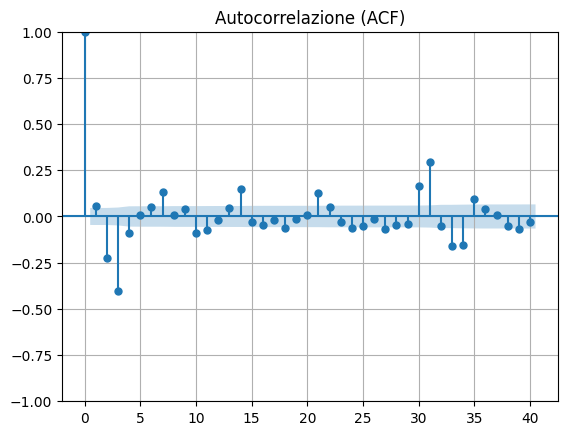

<Figure size 1200x600 with 0 Axes>

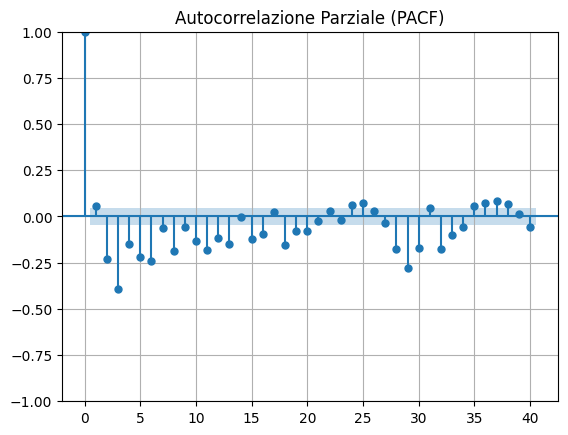

In [45]:
# Grafico ACF (per q)
plt.figure(figsize=(12, 6))
plot_acf(crime_per_day_diff, lags=40, alpha=0.05)  # alpha=0.05 per includere le linee critiche
plt.title('Autocorrelazione (ACF)')
plt.grid(True)
plt.show()

# Grafico PACF (per p)
plt.figure(figsize=(12, 6))
plot_pacf(crime_per_day_diff, lags=40, alpha=0.05)  # alpha=0.05 per includere le linee critiche
plt.title('Autocorrelazione Parziale (PACF)')
plt.grid(True)
plt.show()

### Previsione con ARIMA

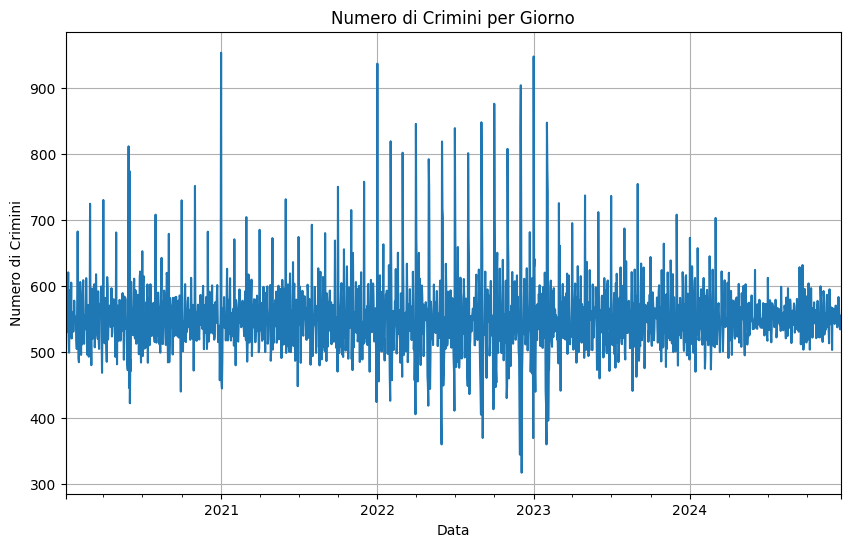

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



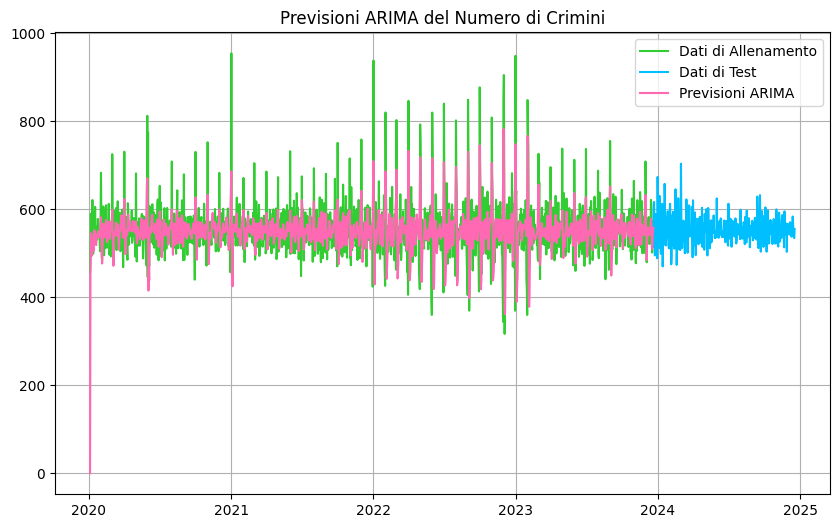

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1448
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -7627.146
Date:                Tue, 11 Feb 2025   AIC                          15268.291
Time:                        12:10:41   BIC                          15305.232
Sample:                    01-04-2020   HQIC                         15282.078
                         - 12-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2960      0.092      3.233      0.001       0.117       0.475
ar.L2         -0.0304      0.062     -0.489      0.625      -0.152       0.091
ar.L3         -0.3612      0.038     -9.602      0.0

In [ ]:
# Visualizziamo la serie temporale
plt.figure(figsize=(10, 6))
crime_per_day_diff.plot()
plt.title("Numero di Crimini per Giorno")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.grid(True)
plt.show()

# Prepariamo la serie temporale per ARIMA
crime_per_day_diff = crime_per_day_diff.asfreq('D')  # Frequenza giornaliera, puoi anche usare 'W' o 'M' se preferisci settimane o mesi
crime_per_day_diff = crime_per_day_diff.fillna(0)  # Gestiamo i valori nulli

# Dividiamo in dati di allenamento e di test (ad esempio, 80% allenamento, 20% test)
cpd = len(crime_per_day_diff)
train_size = int(cpd * 0.8)
train = crime_per_day_diff[:train_size]

# Costruzione e addestramento del modello ARIMA #fare anche senza il seasonal_order perchè esce un grafico più accurato
model = ARIMA(train, order=(3, 1, 3))  # (p, d, q) dove p è il numero di lag, d è la differenza, q è il numero di term
# ax = plt.gca()
model_fit = model.fit()

# Previsione dei crimini nel periodo di test
forecast = model_fit.forecast(steps=len(crime_per_day_diff[train_size-1:]))

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.plot(crime_per_day_diff[:train_size], color='forestgreen', label='Dati di Allenamento')
plt.plot(crime_per_day_diff[train_size-1:], color='aqua', label='Dati di Test')
plt.plot(model_fit.fittedvalues, color='red', label='Previsioni ARIMA')
plt.title("Previsioni ARIMA del Numero di Crimini")
# plt.xlabel("Data")
# plt.ylabel("Numero di Crimini")
plt.grid(True)
plt.legend()
plt.show()

print(model_fit.summary())
print("Il numero degli elementi del periodo considerato è: "+str(cpd))
print("L'indice dell'ultimo elemento del training set è: "+str(train_size))
# Valutazione della previsione (errori)

mse = mean_squared_error(crime_per_day_diff[train_size-1:], forecast)
print(f"Errore Quadratico Medio (MSE): {mse}")

# Calcolare la media giornaliera dei crimini
mean_crime_per_day = crime_per_day_diff.mean()
# Stampare il valore medio giornaliero
print(f"Media giornaliera dei crimini: {mean_crime_per_day:.2f}")
# Calcolare l'RMSE
rmse = np.sqrt(mse)
print(f"Errore Quadratico Medio (RMSE): {rmse:.2f}")


In [49]:
# Filtra i dati per l'anno specifico, ad esempio 2020
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'])  # Assicurati che la colonna 'DATE OCC' sia in formato datetime
crime_2022 = crime[crime['DATE OCC'].dt.year == 2022]  # Filtra i dati per l'anno 2020

# Creiamo una serie temporale con il numero di crimini per giorno per l'anno 2020
crime_per_day_2022 = crime_2022.groupby(crime_2022['DATE OCC']).size()

# Esegui il test di Dickey-Fuller
result = adfuller(crime_per_day_2022)

print(f"Statistiche ADF (2022): {result[0]}")
print(f"P-value (2022): {result[1]}")
print(f"Numero di lags usati: {result[2]}")
print(f"Numero di osservazioni: {result[3]}")
print(f"Valori critici:")
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Se p-value < 0.05, la serie è stazionaria
d = 0  # Inizializziamo d
if result[1] > 0.05:
    d += 1  # Incrementa d perché la serie non è stazionaria

    # Utilizziamo una media mobile per stimare il trend
    window = 7  # Ad esempio, una finestra settimanale
    trend = crime_per_day_2022.rolling(window=window, center=True).mean()

    # Rimuoviamo il trend dalla serie
    detrended_series = crime_per_day_2022 - trend
    crime_per_day_diff = detrended_series + crime_per_day_2022.mean()
    crime_per_day_diff = crime_per_day_diff.dropna()

    # Visualizziamo la serie detrended
    plt.figure(figsize=(10, 6))
    crime_per_day_diff.plot()
    plt.title("Serie Temporale Detrended (2022) - Trend Rimosso, Livello Mantenuto")
    plt.xlabel("Data")
    plt.ylabel("Numero di Crimini")
    plt.grid(True)
    plt.show()

    # Verifica della stazionarietà sulla serie detrended
    result_diff = adfuller(crime_per_day_diff)
    print(f"Statistiche ADF (Serie Detrended 2022): {result_diff[0]}")
    print(f"P-value (Serie Detrended 2022): {result_diff[1]}")

    if result_diff[1] < 0.05:
        print(f"La serie detrended (2022) è stazionaria. Il valore di d è {d}.")
    else:
        print(f"La serie detrended (2022) non è stazionaria. Il valore di d è {d}.")
else:
    print("La serie (2022) è già stazionaria.")
    print(f"Il valore di d è {d}.")

Statistiche ADF (2022): -7.001114239071043
P-value (2022): 7.317845978019102e-10
Numero di lags usati: 7
Numero di osservazioni: 357
Valori critici:
	1%: -3.449
	5%: -2.870
	10%: -2.571
La serie (2022) è già stazionaria.
Il valore di d è 0.


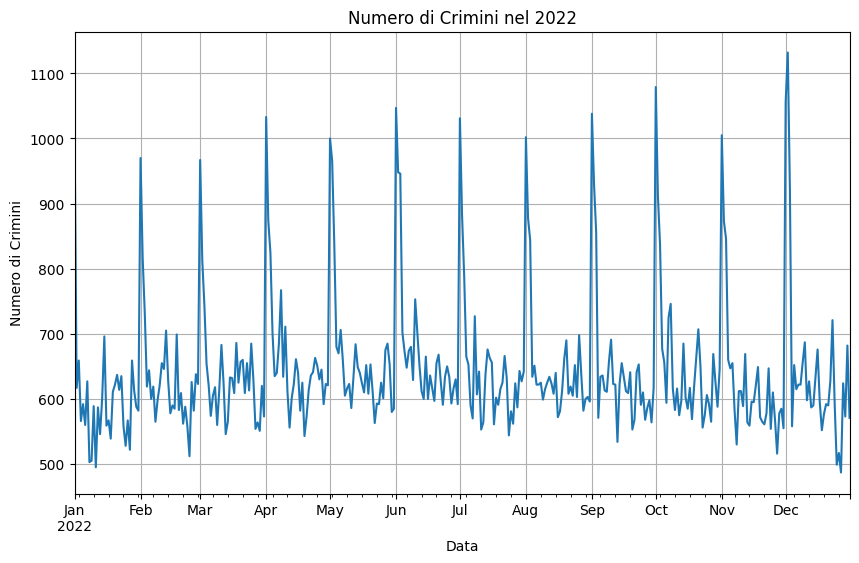

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserW

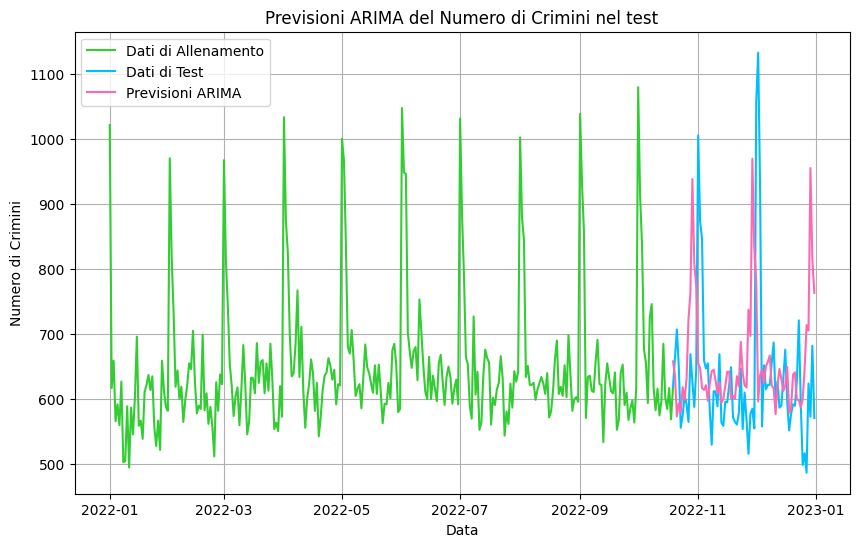

Errore Quadratico Medio (MSE): 21221.132336529216
Media giornaliera dei crimini: 552.26
Errore Quadratico Medio (RMSE): 145.67


In [37]:
# Assicurati che l'indice sia di tipo datetime
crime_per_day.index = pd.to_datetime(crime_per_day.index)

# Selezioniamo i dati per l'anno specifico (ad esempio, 2022)
train_year = 2022
train_data = crime_per_day.loc[str(train_year)]

# Visualizziamo i dati selezionati per l'anno specifico
plt.figure(figsize=(10, 6))
train_data.plot()
plt.title(f"Numero di Crimini nel {train_year}")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.grid(True)
plt.show()

# Dividiamo i dati in allenamento (80%) e test (20%)
train_size = int(len(train_data) * 0.8)
train = train_data[:train_size]
test = train_data[train_size-1:]

# Costruzione e Addestramento del Modello ARIMA
model = ARIMA(train, order=(2, 0, 1), seasonal_order=(1,1,1,90),enforce_invertibility=False)  # (p, d, q) la scelta del seasonal_order migliore è (1,1,1,90)
model_fit = model.fit()

# Previsione dei crimini nel periodo di test
forecast = model_fit.forecast(steps=len(test))

# Ottieni l'indice del test per allineare le previsioni
forecast_index = train_data.index[train_size-1:]

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.plot(train_data[:train_size], color='limegreen', label='Dati di Allenamento')
plt.plot(train_data[train_size-1:], color='deepskyblue', label='Dati di Test')
plt.plot(forecast_index, forecast, color='hotpink', label='Previsioni ARIMA')
plt.title(f"Previsioni ARIMA del Numero di Crimini nel test")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.legend()
plt.grid(True)
plt.show()

# Calcola l'errore quadratico medio

mse = mean_squared_error(test, forecast)
print(f"Errore Quadratico Medio (MSE): {mse}")

# Calcolare la media giornaliera dei crimini
mean_crime_per_day = crime_per_day.mean()
# Stampare il valore medio giornaliero
print(f"Media giornaliera dei crimini: {mean_crime_per_day:.2f}")
# Calcolare l'RMSE
rmse = np.sqrt(mse)
print(f"Errore Quadratico Medio (RMSE): {rmse:.2f}")

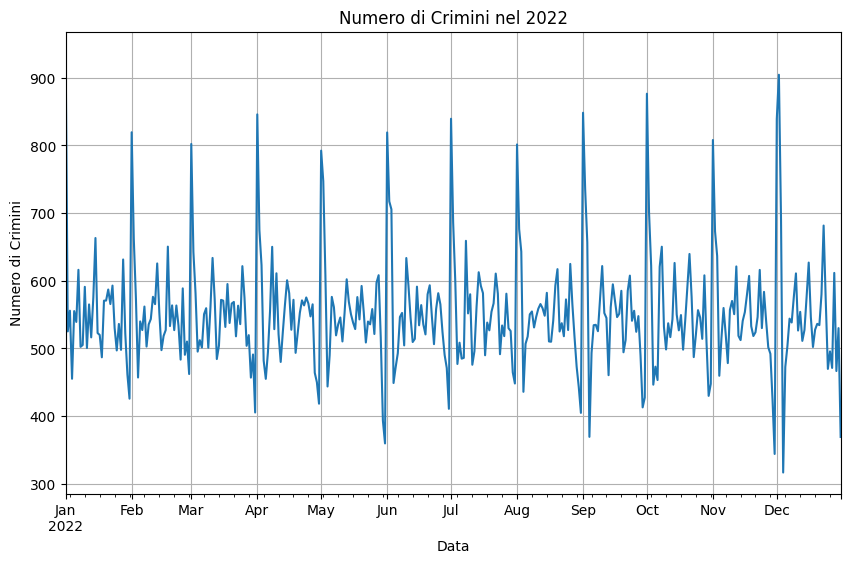

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



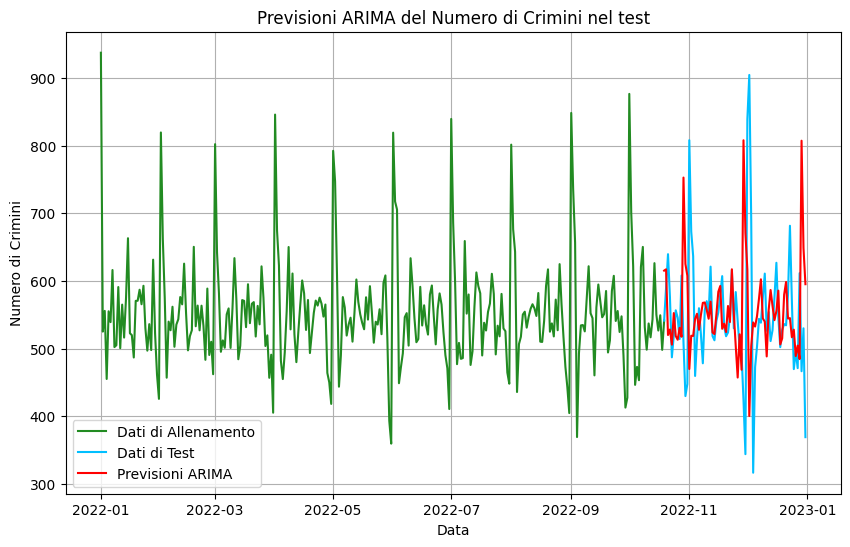

Errore Quadratico Medio (MSE): 17028.826738830954
Media giornaliera dei crimini: 552.26
Errore Quadratico Medio (RMSE): 130.49


In [54]:
# Assicurati che l'indice sia di tipo datetime
crime_per_day_diff.index = pd.to_datetime(crime_per_day_diff.index)

# Selezioniamo i dati per l'anno specifico (ad esempio, 2022)
train_year = 2022
train_data = crime_per_day_diff.loc[str(train_year)]

# Visualizziamo i dati selezionati per l'anno specifico
plt.figure(figsize=(10, 6))
train_data.plot()
plt.title(f"Numero di Crimini nel {train_year}")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.grid(True)
plt.show()

# Dividiamo i dati in allenamento (80%) e test (20%)
train_size = int(len(train_data) * 0.8)
train = train_data[:train_size]
test = train_data[train_size-1:]

# Costruzione e Addestramento del Modello ARIMA
model = ARIMA(train, order=(3, 1, 3), seasonal_order=(1,1,1,90),enforce_invertibility=False)  # (p, d, q) la scelta del seasonal_order migliore è (1,1,1,90)
model_fit = model.fit()

# Previsione dei crimini nel periodo di test
forecast = model_fit.forecast(steps=len(test))

# Ottieni l'indice del test per allineare le previsioni
forecast_index = train_data.index[train_size-1:]

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.plot(train_data[:train_size], color='forestgreen', label='Dati di Allenamento')
plt.plot(train_data[train_size-1:], color='deepskyblue', label='Dati di Test')
plt.plot(forecast_index, forecast, color='red', label='Previsioni ARIMA')
plt.title(f"Previsioni ARIMA del Numero di Crimini nel test")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.legend()
plt.grid(True)
plt.show()

# Calcola l'errore quadratico medio

mse = mean_squared_error(test, forecast)
print(f"Errore Quadratico Medio (MSE): {mse}")

# Calcolare la media giornaliera dei crimini
mean_crime_per_day = crime_per_day.mean()
# Stampare il valore medio giornaliero
print(f"Media giornaliera dei crimini: {mean_crime_per_day:.2f}")
# Calcolare l'RMSE
rmse = np.sqrt(mse)
print(f"Errore Quadratico Medio (RMSE): {rmse:.2f}")

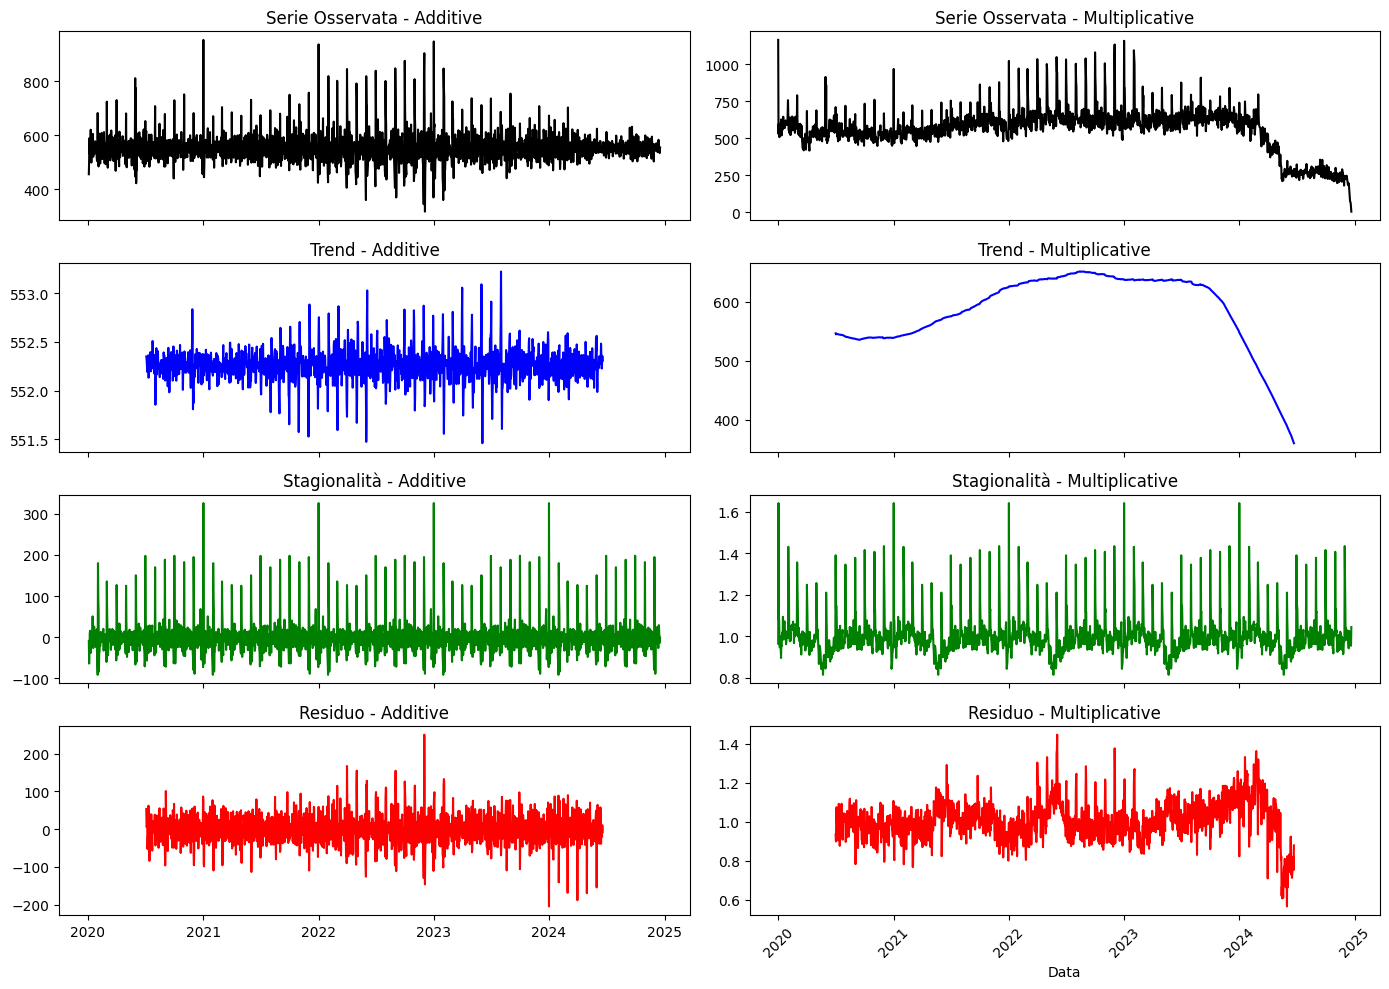

In [48]:
# Decomposizione Additiva
decomp_add = seasonal_decompose(crime_per_day_diff, model='additive', period=365)

# Decomposizione Moltiplicativa
decomp_mult = seasonal_decompose(crime_per_day, model='multiplicative', period=365)

# Creiamo i grafici
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)

# Funzione per disegnare la decomposizione in una colonna
def plot_decomposition(decomp, col, title):
    axes[0][col].plot(decomp.observed, color='black')
    axes[0][col].set_title(f'Serie Osservata - {title}')

    axes[1][col].plot(decomp.trend, color='blue')
    axes[1][col].set_title(f'Trend - {title}')

    axes[2][col].plot(decomp.seasonal, color='green')
    axes[2][col].set_title(f'Stagionalità - {title}')

    axes[3][col].plot(decomp.resid, color='red')
    axes[3][col].set_title(f'Residuo - {title}')

# Disegniamo le decomposizioni
plot_decomposition(decomp_add, 0, "Additive")
plot_decomposition(decomp_mult, 1, "Multiplicative")

# Miglioriamo la leggibilità
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

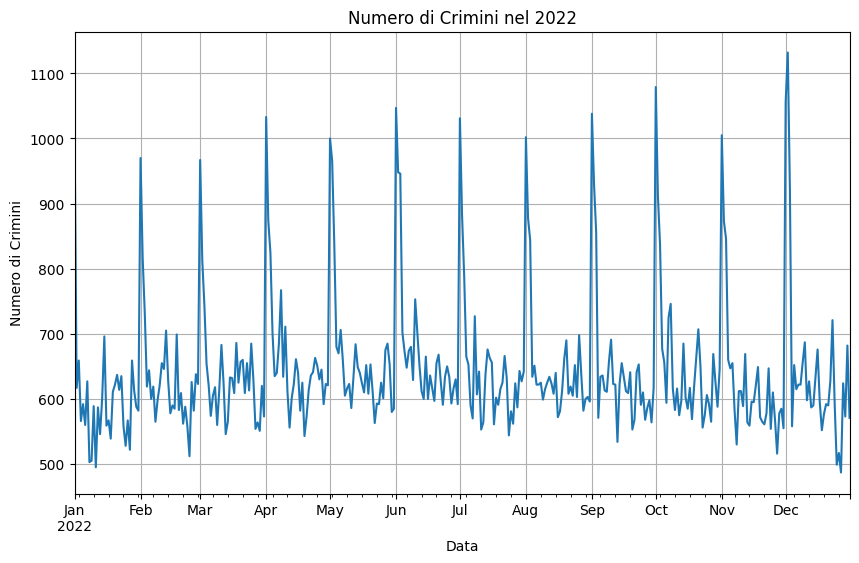

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-p

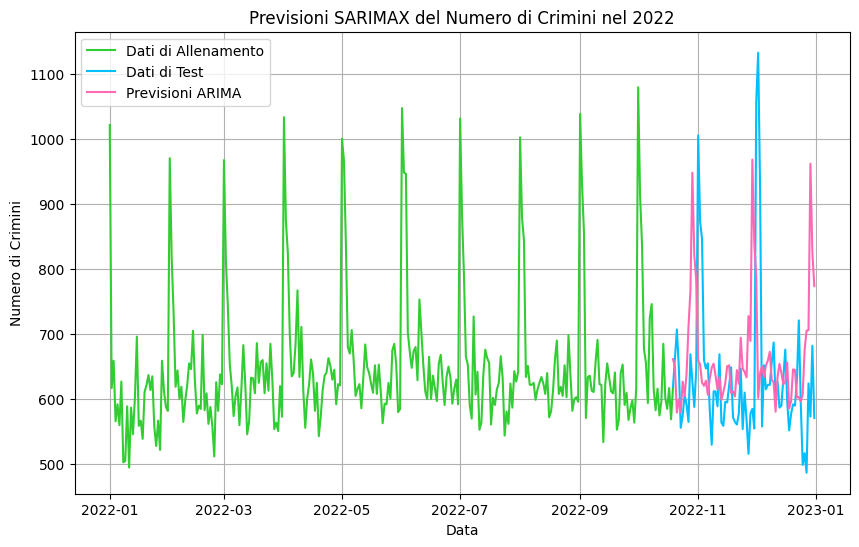

Errore Quadratico Medio (MSE): 21437.715578852418
Media giornaliera dei crimini: 552.26
Errore Quadratico Medio (RMSE): 146.42


In [30]:
# Assicurati che l'indice sia di tipo datetime
crime_per_day.index = pd.to_datetime(crime_per_day.index)

# Selezioniamo i dati per l'anno specifico (ad esempio, 2021)
train_year = 2022
train_data = crime_per_day.loc[str(train_year)]

# Visualizziamo i dati selezionati per l'anno specifico
plt.figure(figsize=(10, 6))
train_data.plot()
plt.title(f"Numero di Crimini nel {train_year}")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.grid(True)
plt.show()

# Dividiamo i dati in allenamento (80%) e test (20%)
train_size = int(len(train_data) * 0.8)
train = train_data[:train_size]
test = train_data[train_size-1:]

# Costruzione e Addestramento del Modello SARIMAX
model = SARIMAX(train, order=(3, 1, 3), seasonal_order=(1,1,1,90),enforce_invertibility=False)  # (p, d, q)
model_fit = model.fit()

# Previsione dei crimini nel periodo di test
forecast = model_fit.forecast(steps=len(test))

# Ottieni l'indice del test per allineare le previsioni
forecast_index = train_data.index[train_size-1:]

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.plot(train_data[:train_size], color='limegreen', label='Dati di Allenamento')
plt.plot(train_data[train_size-1:], color='deepskyblue', label='Dati di Test')
plt.plot(forecast_index, forecast, color='hotpink', label='Previsioni ARIMA')
plt.title(f"Previsioni SARIMAX del Numero di Crimini nel {train_year}")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.legend()
plt.grid(True)
plt.show()

# Calcola l'errore quadratico medio

mse = mean_squared_error(test, forecast)
print(f"Errore Quadratico Medio (MSE): {mse}")
# Calcolare la media giornaliera dei crimini
mean_crime_per_day = crime_per_day.mean()

# Stampare il valore medio giornaliero
print(f"Media giornaliera dei crimini: {mean_crime_per_day:.2f}")
# Calcolare l'RMSE
rmse = np.sqrt(mse)
print(f"Errore Quadratico Medio (RMSE): {rmse:.2f}")

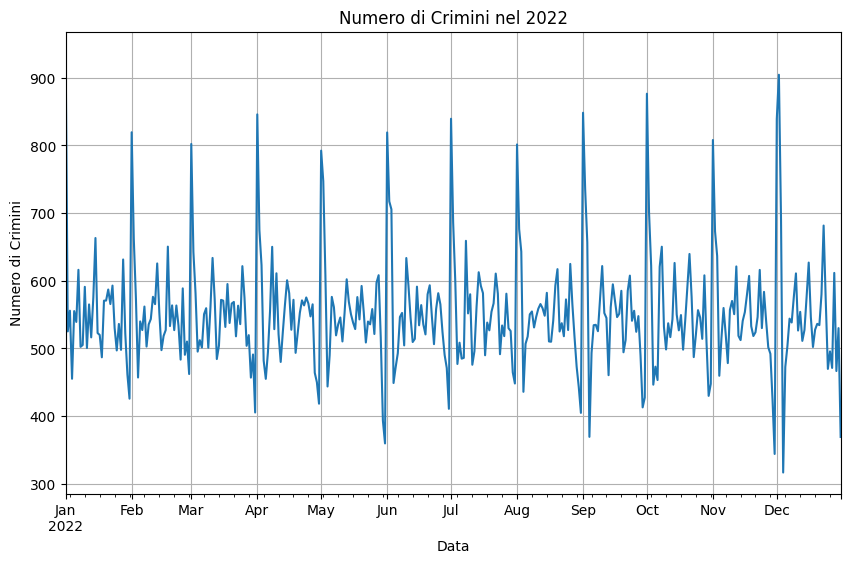

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



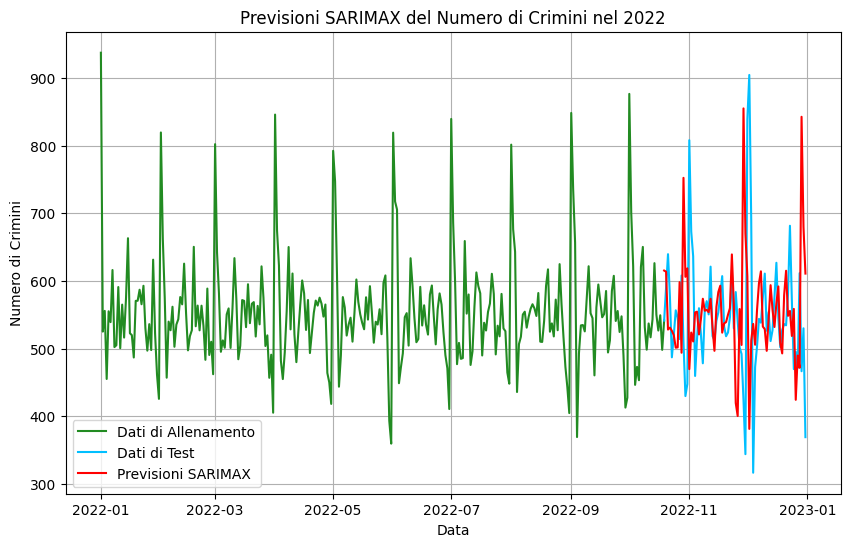

Errore Quadratico Medio (MSE): 19273.084647230207
Media giornaliera dei crimini: 552.21
Errore Quadratico Medio (RMSE): 138.83


In [57]:
# Assicurati che l'indice sia di tipo datetime
crime_per_day_diff.index = pd.to_datetime(crime_per_day_diff.index)

# Selezioniamo i dati per l'anno specifico (ad esempio, 2021)
train_year = 2022
train_data = crime_per_day_diff.loc[str(train_year)]

# Visualizziamo i dati selezionati per l'anno specifico
plt.figure(figsize=(10, 6))
train_data.plot()
plt.title(f"Numero di Crimini nel {train_year}")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.grid(True)
plt.show()

# Dividiamo i dati in allenamento (80%) e test (20%)
train_size = int(len(train_data) * 0.8)
train = train_data[:train_size]
test = train_data[train_size-1:]

# Costruzione e Addestramento del Modello SARIMAX
model = SARIMAX(train, order=(3, 1, 3), seasonal_order=(1,1,1,90))  # (p, d, q)
model_fit = model.fit()

# Previsione dei crimini nel periodo di test
forecast = model_fit.forecast(steps=len(test))

# Ottieni l'indice del test per allineare le previsioni
forecast_index = train_data.index[train_size-1:]

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.plot(train_data[:train_size], color='forestgreen', label='Dati di Allenamento')
plt.plot(train_data[train_size-1:], color='deepskyblue', label='Dati di Test')
plt.plot(forecast_index, forecast, color='red', label='Previsioni SARIMAX')
plt.title(f"Previsioni SARIMAX del Numero di Crimini nel {train_year}")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.legend()
plt.grid(True)
plt.show()

# Calcola l'errore quadratico medio

mse = mean_squared_error(test, forecast)
print(f"Errore Quadratico Medio (MSE): {mse}")
# Calcolare la media giornaliera dei crimini
mean_crime_per_day = crime_per_day_diff.mean()

# Stampare il valore medio giornaliero
print(f"Media giornaliera dei crimini: {mean_crime_per_day:.2f}")
# Calcolare l'RMSE
rmse = np.sqrt(mse)
print(f"Errore Quadratico Medio (RMSE): {rmse:.2f}")

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



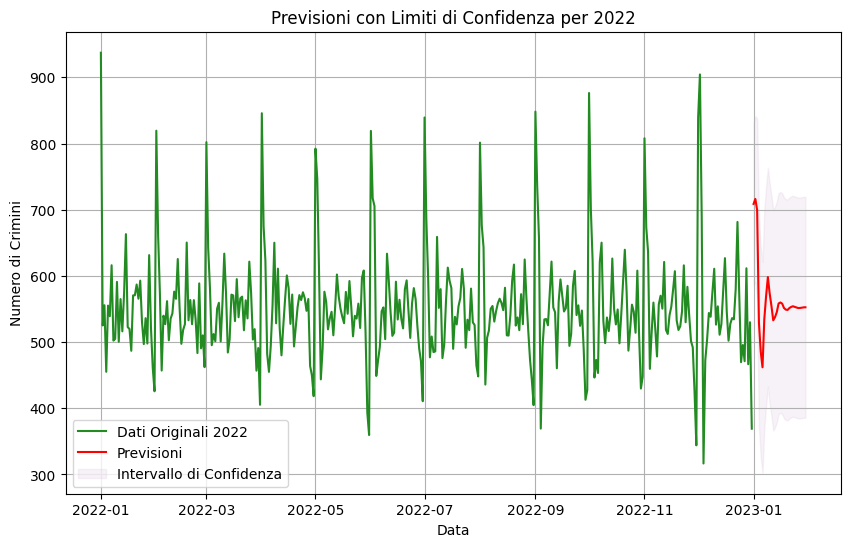

In [53]:
# Passo 1: Assicurati che l'indice sia di tipo datetime
crime_per_day_diff.index = pd.to_datetime(crime_per_day_diff.index)

# Passo 2: Seleziona i dati per l'anno specifico
train_year = 2022
train_data = crime_per_day_diff.loc[crime_per_day_diff.index.year == train_year]

# Controlla che il dataset non sia vuoto
if train_data.empty:
    raise ValueError(f"Nessun dato disponibile per l'anno {train_year}")

# Passo 3: Costruzione e Addestramento del Modello ARIMA
model = ARIMA(train_data, order=(3, 1, 3))  # p, d=1, q per gestire trend
model_fit = model.fit()

# Passo 4: Previsione futura per 30 giorni
forecast_steps = 30
forecast_result = model_fit.get_forecast(steps=forecast_steps)

# Passo 5: Ottieni i valori previsti e i limiti di confidenza
forecast_values = forecast_result.predicted_mean
confidence_int = forecast_result.conf_int()

# Passo 6: Crea un asse temporale corretto per la previsione
forecast_dates = pd.date_range(start=train_data.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Passo 7: Visualizza il risultato
plt.figure(figsize=(10, 6))
plt.plot(train_data, label=f"Dati Originali {train_year}",color='forestgreen')
plt.plot(forecast_dates, forecast_values, color='red', label='Previsioni')
plt.fill_between(forecast_dates, confidence_int.iloc[:, 0], confidence_int.iloc[:, 1], color='thistle', alpha=0.2, label="Intervallo di Confidenza")

plt.title(f"Previsioni con Limiti di Confidenza per {train_year}")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



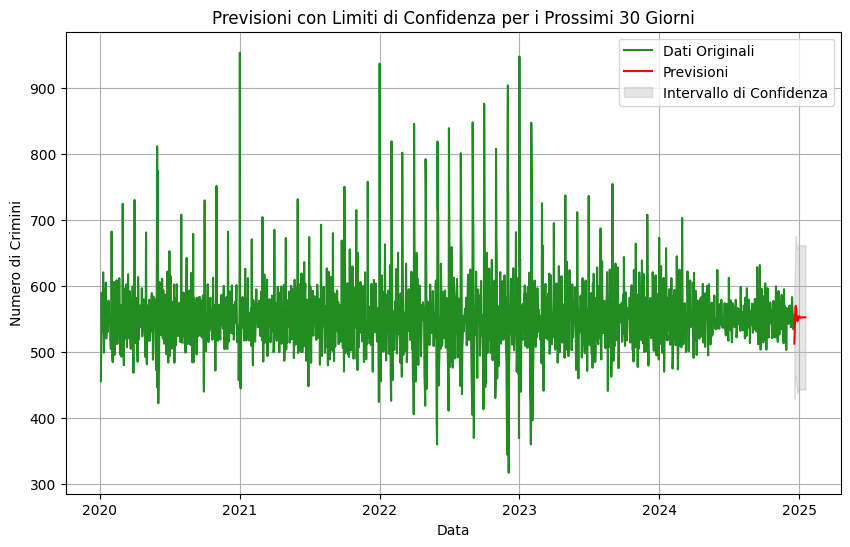

In [56]:
# Passo 1: Assicurati che l'indice sia di tipo datetime
crime_per_day_diff.index = pd.to_datetime(crime_per_day_diff.index)

# Passo 2: Imposta la frequenza giornaliera e gestisci i valori nulli
crime_per_day_diff = crime_per_day_diff.asfreq('D')  # Frequenza giornaliera
crime_per_day_diff = crime_per_day_diff.fillna(0)  # Sostituzione dei valori nulli con zero

# Passo 3: Costruzione e Addestramento del Modello ARIMA usando tutto il dataset
model = ARIMA(crime_per_day_diff, order=(3, 1, 3))  # Parametri (p, d=1, q)
model_fit = model.fit()

# Passo 4: Previsione futura per 30 giorni
forecast_steps = 30
forecast_result = model_fit.get_forecast(steps=forecast_steps)

# Passo 5: Ottieni i valori previsti e i limiti di confidenza
forecast_values = forecast_result.predicted_mean
confidence_int = forecast_result.conf_int()

# Passo 6: Crea un asse temporale corretto per la previsione
forecast_dates = pd.date_range(start=crime_per_day_diff.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Passo 7: Visualizza il risultato
plt.figure(figsize=(10, 6))
plt.plot(crime_per_day_diff, label="Dati Originali", color='forestgreen')
plt.plot(forecast_dates, forecast_values, color='red', label='Previsioni')
plt.fill_between(forecast_dates, confidence_int.iloc[:, 0], confidence_int.iloc[:, 1], color='grey', alpha=0.2, label="Intervallo di Confidenza")

plt.title("Previsioni con Limiti di Confidenza per i Prossimi 30 Giorni")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.legend()
plt.grid(True)
plt.show()
